In [1]:
from utils.binaries import *
from utils.plotting import *

import os

16:34:21 (+23429.6s) [INFO   ] -- import logging
16:34:21 (   +61ms) [INFO   ] -- import numpy as np
16:34:21 (    +6ms) [INFO   ] -- import uncertainties
16:34:21 (  +195ms) [INFO   ] -- import pandas as pd
16:34:21 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
16:34:21 (    +1ms) [INFO   ] -- import binaries.tools as tools
16:34:22 (  +268ms) [INFO   ] -- import matplotlib.pyplot as plt
16:34:22 (  +325ms) [INFO   ] -- import seaborn as so
16:34:22 (    +1ms) [INFO   ] -- import plotting.tools as plot
16:34:22 (    +7ms) [DEBUG  ] -- font size set to 9.5
16:34:22 (    +0ms) [DEBUG  ] -- label size set to 13.0
16:34:22 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
16:34:22 (    +1ms) [DEBUG  ] -- markersize set to 2.0
16:34:22 (    +1ms) [DEBUG  ] -- usetex set to False


Text(0.5, 0, 'pulse search window (start_stop)')

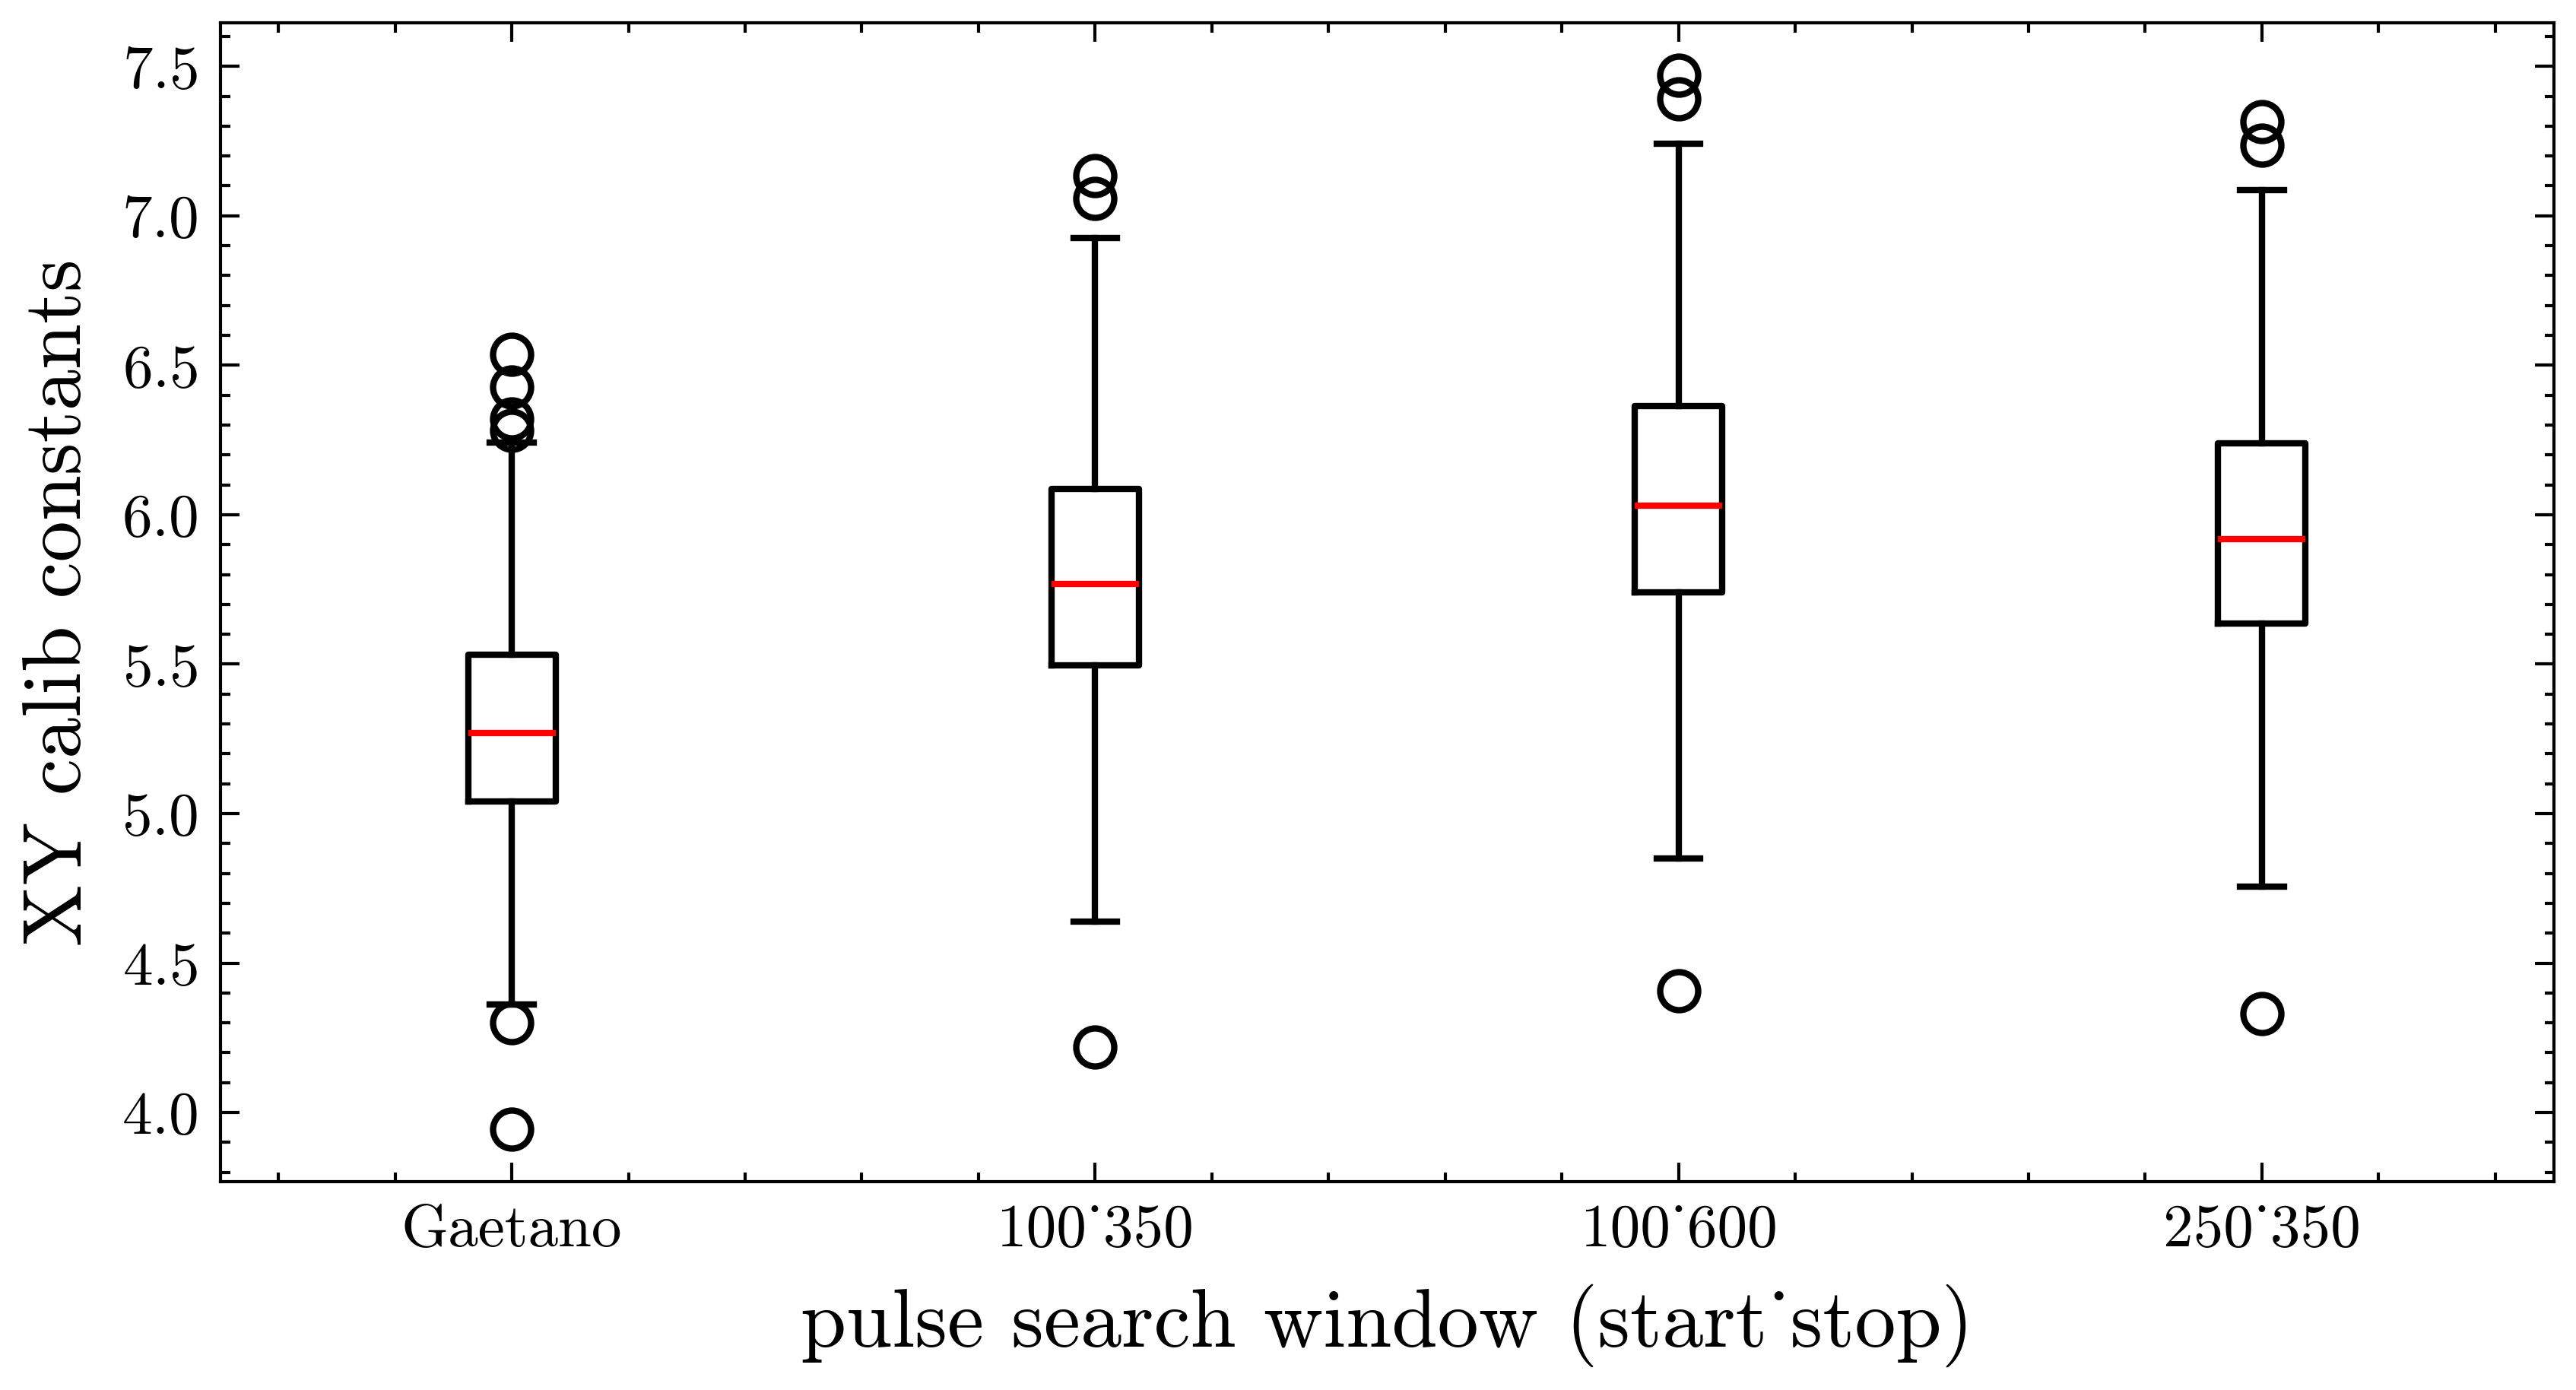

In [4]:
pos = 0

for file in os.listdir():
    if not file.startswith("outCorr"):
        continue

    pulse_interval = file[-11:-4]
    if "Fix" in file:
        pulse_interval = "Gaetano"

    calib_const_corr = np.loadtxt(file, usecols=[-1])

    plt.boxplot(calib_const_corr, positions=[pos], tick_labels=[pulse_interval])

    pos += 1

plt.ylabel("XY calib constants")
plt.xlabel("pulse search window (start_stop)")

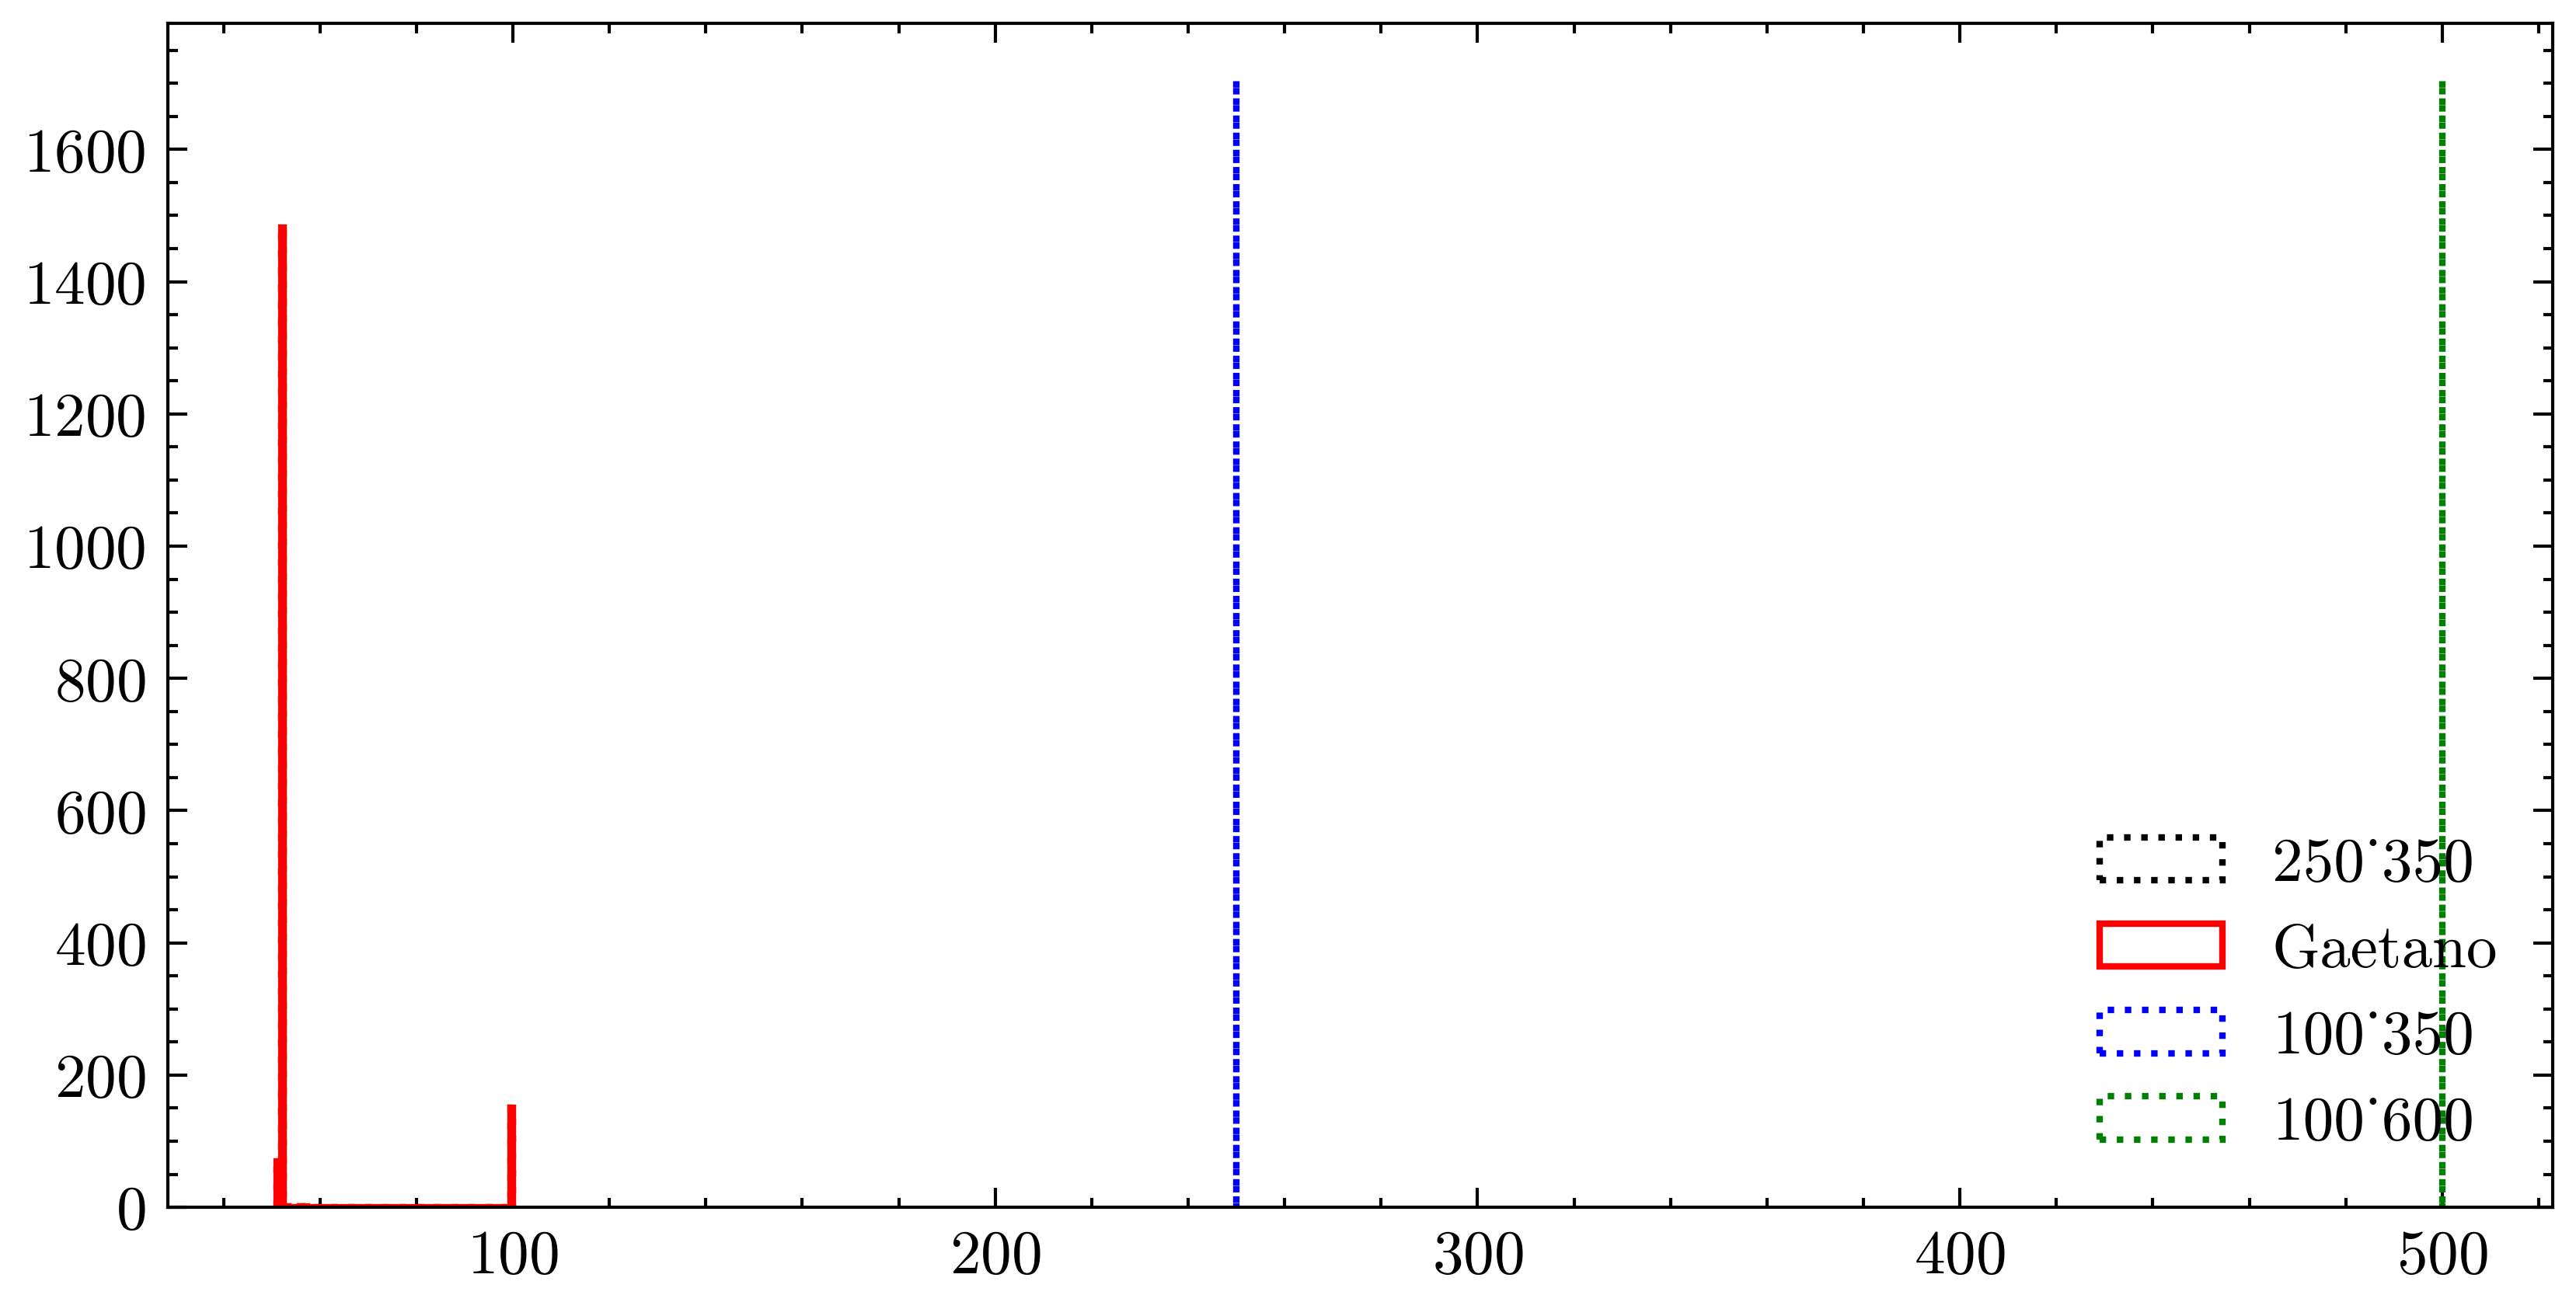

In [5]:
for file in os.listdir():
    if not file.startswith("pulseTiming"):
        continue
    ls = ":"

    pulse_interval = file[-11:-4]
    if "Fix" in file:
        pulse_interval = "Gaetano"
        ls = "solid"

    pulse_length = np.loadtxt(file, usecols=[3])

    plt.hist(pulse_length, histtype="step", label=pulse_interval, bins=100, ls=ls)

plt.legend()

In [2]:
gaetano_data = np.loadtxt("outCorrFixFix_15487.txt")
paul_data = np.loadtxt("outCorr_15487_250_350.txt")

In [3]:
print(gaetano_data.shape, paul_data.shape)

(440, 5) (440, 5)


In [4]:
integral_g = gaetano_data[:, 2]
integral_p = paul_data[:, 2]
calib_g = gaetano_data[:, -1]
calib_p = paul_data[:, -1]

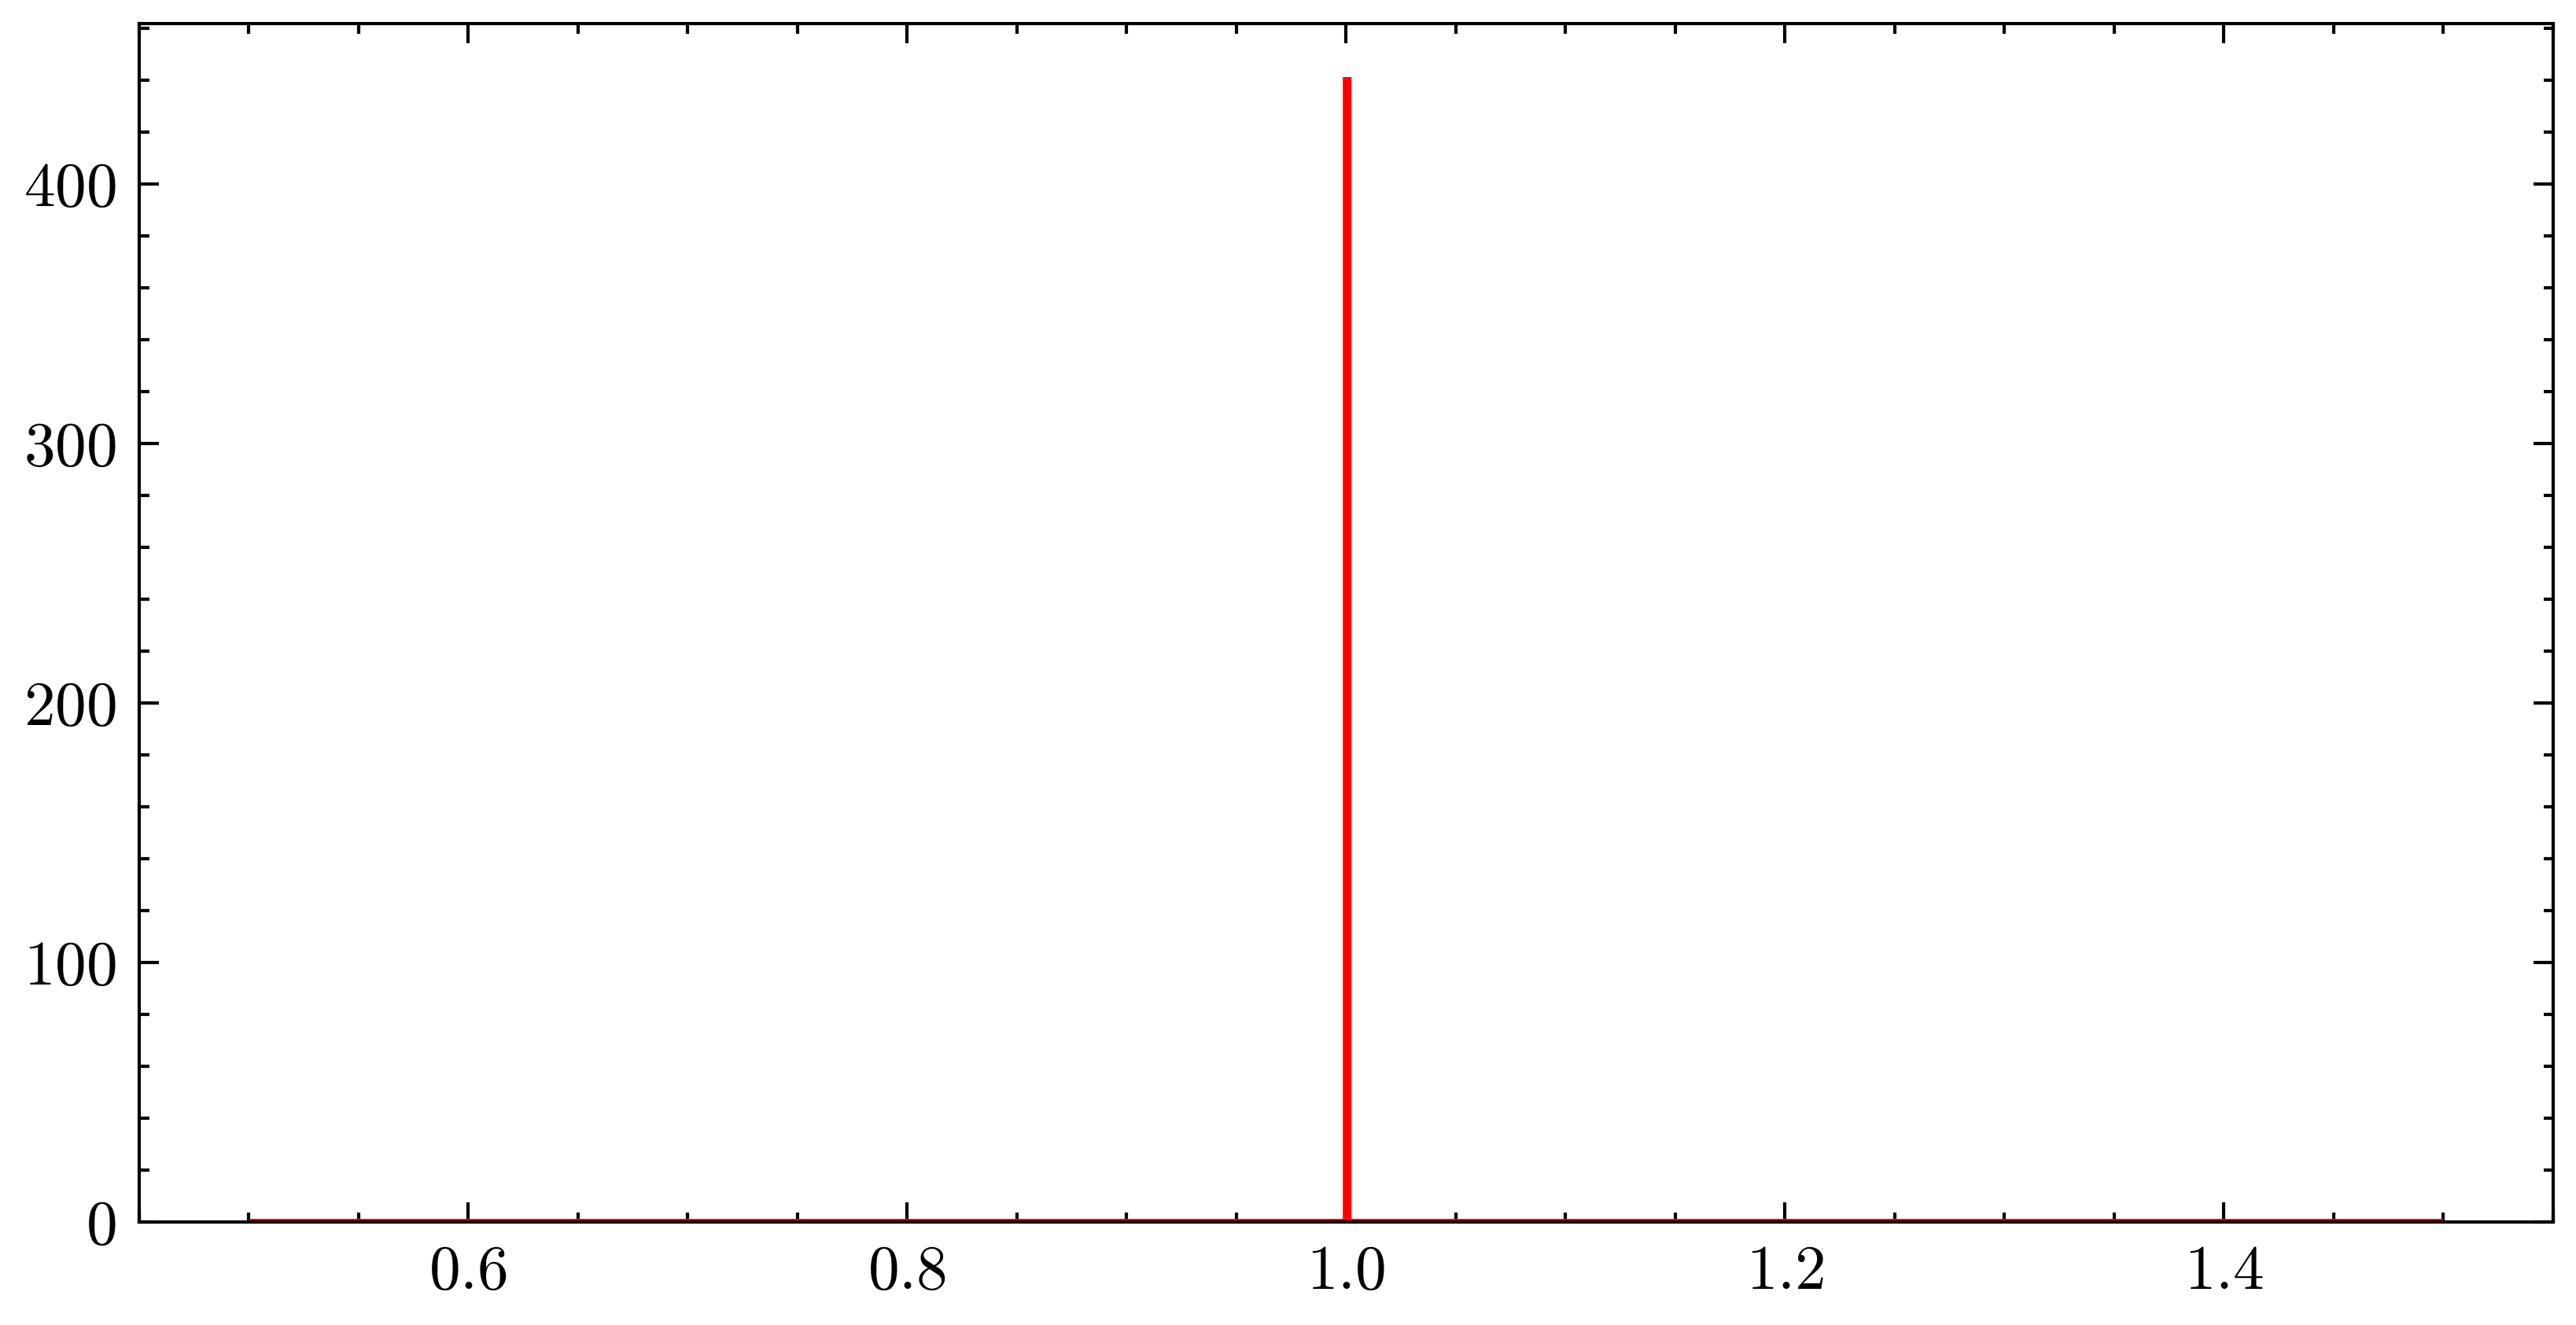

In [8]:
_ = plt.hist(integral_g / integral_p, bins=1000)
_ = plt.hist(calib_p / calib_g, histtype="step", bins=1000)